<a href="https://colab.research.google.com/github/akinyeleolat/weather-image-classification/blob/main/weather_multiclass_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='oluwatosinaakinyele'
os.environ['KAGGLE_KEY']='******'

In [ ]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 98% 132M/134M [00:01<00:00, 126MB/s]
100% 134M/134M [00:01<00:00, 118MB/s]


In [ ]:
#upload data
from zipfile import ZipFile
file_name ="/content/multiclass-weather-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


## Step 2 Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)
# print(file_count)

['foggy', 'shine', 'rainy', 'alien_test', 'sunrise', 'cloudy', 'test.csv']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

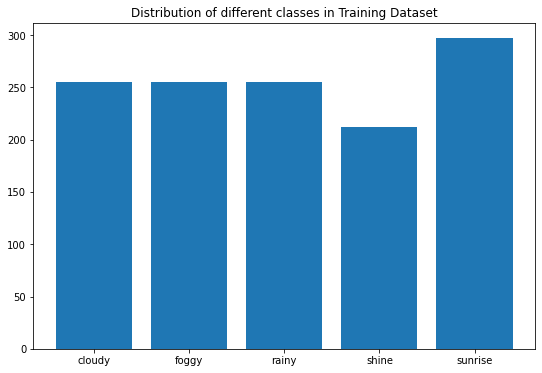

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


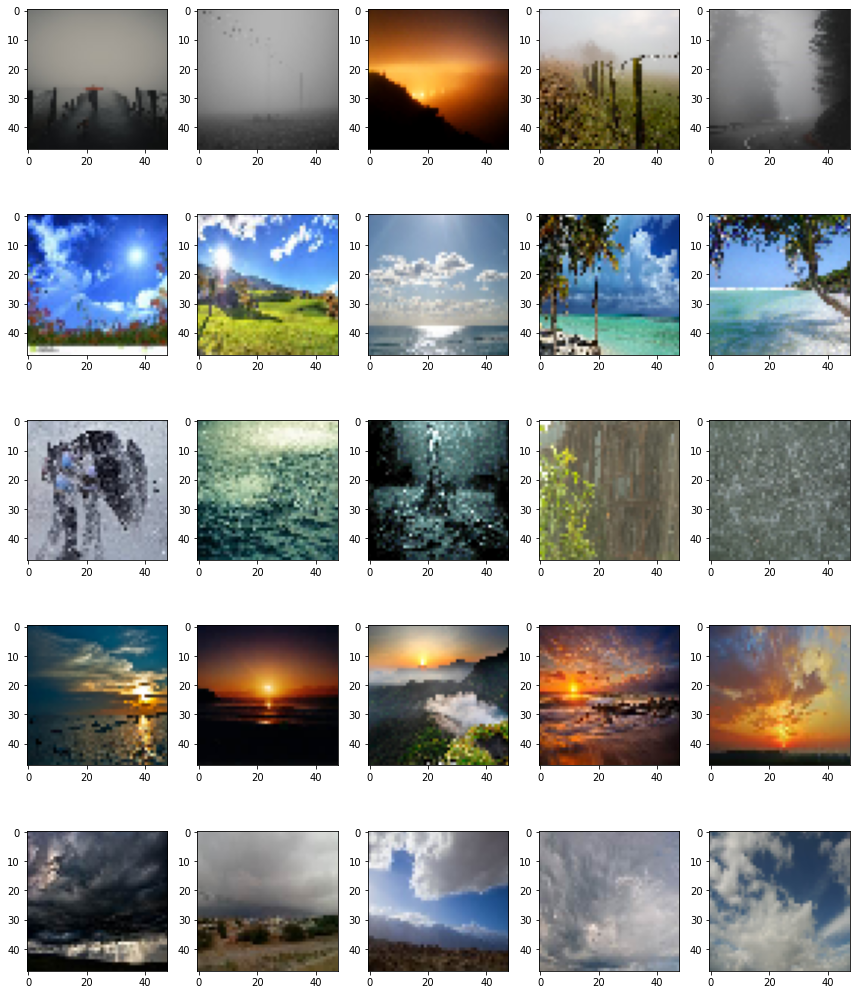

In [ ]:
# display some images for every different weather

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/weather-data/"

plt.figure(0, figsize=(12,20))
cpt = 0

for weather in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + weather + "/" +os.listdir(base_path + "train/" + weather)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

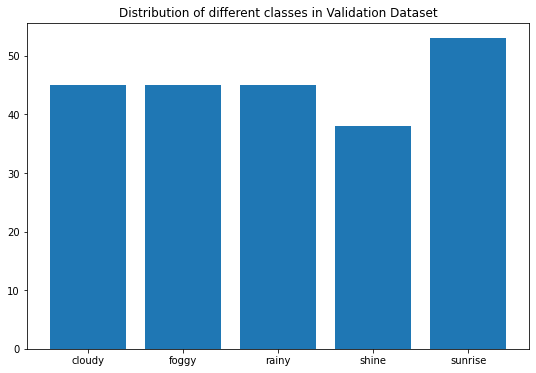

In [ ]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

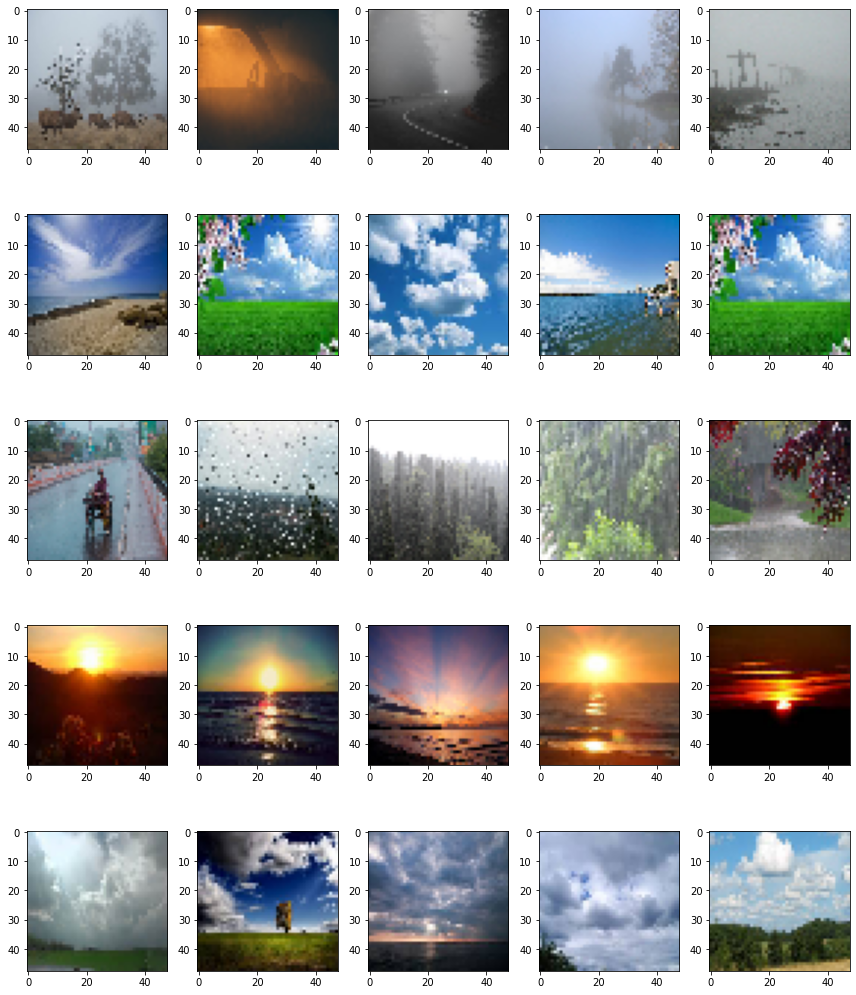

In [ ]:
# display some images for every different weather

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/weather-data/"

plt.figure(0, figsize=(12,20))
cpt = 0

for weather in os.listdir(base_path + "validation/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "validation/" + weather + "/" +os.listdir(base_path + "validation/" + weather)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Valid cloudy images are: 45
Valid foggy images are: 45
Valid rainy images are: 45
Valid shine images are: 38
Valid sunrise images are: 53


## Step 3. Deep Learning with Data Augumentation

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=16

In [ ]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [ ]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])


In [ ]:
history = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/50
80/80 [==============================] - ETA: 0s - loss: 1.4861 - accuracy: 0.3297

80/80 [==============================] - 39s 337ms/step - loss: 1.4861 - accuracy: 0.3297 - val_loss: 1.4541 - val_accuracy: 0.3894
Epoch 2/50
80/80 [==============================] - ETA: 0s - loss: 1.2137 - accuracy: 0.4137

80/80 [==============================] - 26s 329ms/step - loss: 1.2137 - accuracy: 0.4137 - val_loss: 1.2287 - val_accuracy: 0.3761
Epoch 3/50
80/80 [==============================] - ETA: 0s - loss: 1.1844 - accuracy: 0.4137

80/80 [==============================] - 28s 347ms/step - loss: 1.1844 - accuracy: 0.4137 - val_loss: 1.2847 - val_accuracy: 0.4204
Epoch 4/50
80/80 [==============================] - ETA: 0s - loss: 1.1901 - accuracy: 0.4254

80/80 [==============================] - 26s 329ms/step - loss: 1.1901 - accuracy: 0.4254 - val_loss: 1.1403 - val_accuracy: 0.5088
Epoch 5/50
80/80 [==============================] - ETA: 0s - loss: 1.1524 - accuracy: 0.4882

80/80 [==============================] - 26s 329ms/step - loss: 1.1524 - accuracy: 0.4882 - val_loss: 0.9741 - val_accuracy: 0.5487
Epoch 6/50
80/80 [==============================] - ETA: 0s - loss: 1.0220 - accuracy: 0.5298

80/80 [==============================] - 26s 328ms/step - loss: 1.0220 - accuracy: 0.5298 - val_loss: 0.9706 - val_accuracy: 0.5442
Epoch 7/50
80/80 [==============================] - ETA: 0s - loss: 0.9582 - accuracy: 0.5667

80/80 [==============================] - 26s 329ms/step - loss: 0.9582 - accuracy: 0.5667 - val_loss: 0.9038 - val_accuracy: 0.5664
Epoch 8/50
80/80 [==============================] - ETA: 0s - loss: 0.9408 - accuracy: 0.5683

80/80 [==============================] - 26s 329ms/step - loss: 0.9408 - accuracy: 0.5683 - val_loss: 0.8648 - val_accuracy: 0.6150
Epoch 9/50
80/80 [==============================] - ETA: 0s - loss: 0.9434 - accuracy: 0.5730

80/80 [==============================] - 26s 328ms/step - loss: 0.9434 - accuracy: 0.5730 - val_loss: 0.9004 - val_accuracy: 0.6327
Epoch 10/50
80/80 [==============================] - ETA: 0s - loss: 0.9335 - accuracy: 0.5926

80/80 [==============================] - 26s 327ms/step - loss: 0.9335 - accuracy: 0.5926 - val_loss: 0.9099 - val_accuracy: 0.6106
Epoch 11/50
80/80 [==============================] - ETA: 0s - loss: 0.9048 - accuracy: 0.6052

80/80 [==============================] - 26s 326ms/step - loss: 0.9048 - accuracy: 0.6052 - val_loss: 0.8396 - val_accuracy: 0.6416
Epoch 12/50
80/80 [==============================] - ETA: 0s - loss: 0.9082 - accuracy: 0.5840

80/80 [==============================] - 26s 327ms/step - loss: 0.9082 - accuracy: 0.5840 - val_loss: 0.8976 - val_accuracy: 0.5531
Epoch 13/50
80/80 [==============================] - ETA: 0s - loss: 0.8956 - accuracy: 0.5965

80/80 [==============================] - 26s 326ms/step - loss: 0.8956 - accuracy: 0.5965 - val_loss: 0.8499 - val_accuracy: 0.5796
Epoch 14/50
80/80 [==============================] - ETA: 0s - loss: 0.8734 - accuracy: 0.5816

80/80 [==============================] - 26s 326ms/step - loss: 0.8734 - accuracy: 0.5816 - val_loss: 0.8653 - val_accuracy: 0.6150
Epoch 15/50
80/80 [==============================] - ETA: 0s - loss: 0.8500 - accuracy: 0.6036

80/80 [==============================] - 26s 326ms/step - loss: 0.8500 - accuracy: 0.6036 - val_loss: 0.8452 - val_accuracy: 0.6283
Epoch 16/50
80/80 [==============================] - ETA: 0s - loss: 0.8420 - accuracy: 0.6232

80/80 [==============================] - 26s 324ms/step - loss: 0.8420 - accuracy: 0.6232 - val_loss: 0.9473 - val_accuracy: 0.6460
Epoch 17/50
80/80 [==============================] - ETA: 0s - loss: 0.8340 - accuracy: 0.6436

80/80 [==============================] - 26s 327ms/step - loss: 0.8340 - accuracy: 0.6436 - val_loss: 0.8958 - val_accuracy: 0.6283
Epoch 18/50
80/80 [==============================] - ETA: 0s - loss: 0.9221 - accuracy: 0.5895

80/80 [==============================] - 26s 327ms/step - loss: 0.9221 - accuracy: 0.5895 - val_loss: 1.4977 - val_accuracy: 0.5973
Epoch 19/50
80/80 [==============================] - ETA: 0s - loss: 0.9293 - accuracy: 0.6115

80/80 [==============================] - 26s 331ms/step - loss: 0.9293 - accuracy: 0.6115 - val_loss: 0.8729 - val_accuracy: 0.6372
Epoch 20/50
80/80 [==============================] - ETA: 0s - loss: 0.8178 - accuracy: 0.6311

80/80 [==============================] - 26s 326ms/step - loss: 0.8178 - accuracy: 0.6311 - val_loss: 0.8421 - val_accuracy: 0.5885
Epoch 21/50
80/80 [==============================] - ETA: 0s - loss: 0.8631 - accuracy: 0.6240

80/80 [==============================] - 26s 327ms/step - loss: 0.8631 - accuracy: 0.6240 - val_loss: 0.8503 - val_accuracy: 0.6504
Epoch 22/50
80/80 [==============================] - ETA: 0s - loss: 0.8569 - accuracy: 0.6217

80/80 [==============================] - 26s 327ms/step - loss: 0.8569 - accuracy: 0.6217 - val_loss: 0.7862 - val_accuracy: 0.6593
Epoch 23/50
80/80 [==============================] - ETA: 0s - loss: 0.8017 - accuracy: 0.6264

80/80 [==============================] - 26s 326ms/step - loss: 0.8017 - accuracy: 0.6264 - val_loss: 0.7742 - val_accuracy: 0.6681
Epoch 24/50
80/80 [==============================] - ETA: 0s - loss: 0.8330 - accuracy: 0.6413

80/80 [==============================] - 26s 323ms/step - loss: 0.8330 - accuracy: 0.6413 - val_loss: 0.9594 - val_accuracy: 0.6239
Epoch 25/50
80/80 [==============================] - ETA: 0s - loss: 0.7984 - accuracy: 0.6405

80/80 [==============================] - 26s 327ms/step - loss: 0.7984 - accuracy: 0.6405 - val_loss: 1.0245 - val_accuracy: 0.6549
Epoch 26/50
80/80 [==============================] - ETA: 0s - loss: 0.8501 - accuracy: 0.6224

80/80 [==============================] - 26s 327ms/step - loss: 0.8501 - accuracy: 0.6224 - val_loss: 0.8764 - val_accuracy: 0.6018
Epoch 27/50
80/80 [==============================] - ETA: 0s - loss: 0.7653 - accuracy: 0.6750

80/80 [==============================] - 26s 328ms/step - loss: 0.7653 - accuracy: 0.6750 - val_loss: 0.8956 - val_accuracy: 0.6726
Epoch 28/50
80/80 [==============================] - ETA: 0s - loss: 0.8105 - accuracy: 0.6554

80/80 [==============================] - 26s 327ms/step - loss: 0.8105 - accuracy: 0.6554 - val_loss: 0.8761 - val_accuracy: 0.6416
Epoch 29/50
80/80 [==============================] - ETA: 0s - loss: 0.7947 - accuracy: 0.6601

80/80 [==============================] - 26s 328ms/step - loss: 0.7947 - accuracy: 0.6601 - val_loss: 0.8752 - val_accuracy: 0.6903
Epoch 30/50
80/80 [==============================] - ETA: 0s - loss: 0.7525 - accuracy: 0.6805

80/80 [==============================] - 26s 326ms/step - loss: 0.7525 - accuracy: 0.6805 - val_loss: 0.7814 - val_accuracy: 0.6770
Epoch 31/50
80/80 [==============================] - ETA: 0s - loss: 0.7548 - accuracy: 0.6860

80/80 [==============================] - 26s 321ms/step - loss: 0.7548 - accuracy: 0.6860 - val_loss: 0.7477 - val_accuracy: 0.6991
Epoch 32/50
80/80 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.6954

80/80 [==============================] - 26s 325ms/step - loss: 0.7652 - accuracy: 0.6954 - val_loss: 0.7144 - val_accuracy: 0.6814
Epoch 33/50
80/80 [==============================] - ETA: 0s - loss: 0.7105 - accuracy: 0.7119

80/80 [==============================] - 26s 330ms/step - loss: 0.7105 - accuracy: 0.7119 - val_loss: 0.7295 - val_accuracy: 0.6814
Epoch 34/50
80/80 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.7166

80/80 [==============================] - 26s 328ms/step - loss: 0.6919 - accuracy: 0.7166 - val_loss: 0.7358 - val_accuracy: 0.6681
Epoch 35/50
80/80 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.7339

80/80 [==============================] - 26s 325ms/step - loss: 0.6791 - accuracy: 0.7339 - val_loss: 0.9834 - val_accuracy: 0.6991
Epoch 36/50
80/80 [==============================] - ETA: 0s - loss: 0.7164 - accuracy: 0.7339

80/80 [==============================] - 26s 326ms/step - loss: 0.7164 - accuracy: 0.7339 - val_loss: 0.7107 - val_accuracy: 0.7124
Epoch 37/50
80/80 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.7245

80/80 [==============================] - 27s 331ms/step - loss: 0.6736 - accuracy: 0.7245 - val_loss: 0.8720 - val_accuracy: 0.6637
Epoch 38/50
80/80 [==============================] - ETA: 0s - loss: 0.7054 - accuracy: 0.7245

80/80 [==============================] - 26s 326ms/step - loss: 0.7054 - accuracy: 0.7245 - val_loss: 0.6926 - val_accuracy: 0.7080
Epoch 39/50
80/80 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.7418

80/80 [==============================] - 26s 325ms/step - loss: 0.6877 - accuracy: 0.7418 - val_loss: 0.7109 - val_accuracy: 0.7212
Epoch 40/50
80/80 [==============================] - ETA: 0s - loss: 0.6649 - accuracy: 0.7323

80/80 [==============================] - 26s 329ms/step - loss: 0.6649 - accuracy: 0.7323 - val_loss: 0.8913 - val_accuracy: 0.7124
Epoch 41/50
80/80 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.7457

80/80 [==============================] - 26s 327ms/step - loss: 0.6796 - accuracy: 0.7457 - val_loss: 0.7297 - val_accuracy: 0.7168
Epoch 42/50
80/80 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.7520

80/80 [==============================] - 26s 324ms/step - loss: 0.6281 - accuracy: 0.7520 - val_loss: 0.7206 - val_accuracy: 0.7168
Epoch 43/50
80/80 [==============================] - ETA: 0s - loss: 0.6066 - accuracy: 0.7669

80/80 [==============================] - 26s 326ms/step - loss: 0.6066 - accuracy: 0.7669 - val_loss: 0.6711 - val_accuracy: 0.7478
Epoch 44/50
80/80 [==============================] - ETA: 0s - loss: 0.6058 - accuracy: 0.7488

80/80 [==============================] - 26s 330ms/step - loss: 0.6058 - accuracy: 0.7488 - val_loss: 0.7570 - val_accuracy: 0.7257
Epoch 45/50
80/80 [==============================] - ETA: 0s - loss: 0.6064 - accuracy: 0.7614

80/80 [==============================] - 26s 326ms/step - loss: 0.6064 - accuracy: 0.7614 - val_loss: 0.7440 - val_accuracy: 0.7257
Epoch 46/50
80/80 [==============================] - ETA: 0s - loss: 0.5648 - accuracy: 0.7779

80/80 [==============================] - 26s 326ms/step - loss: 0.5648 - accuracy: 0.7779 - val_loss: 0.6646 - val_accuracy: 0.7965
Epoch 47/50
80/80 [==============================] - ETA: 0s - loss: 0.6616 - accuracy: 0.7457

80/80 [==============================] - 26s 329ms/step - loss: 0.6616 - accuracy: 0.7457 - val_loss: 0.6428 - val_accuracy: 0.7611
Epoch 48/50
80/80 [==============================] - ETA: 0s - loss: 0.5772 - accuracy: 0.7810

80/80 [==============================] - 26s 329ms/step - loss: 0.5772 - accuracy: 0.7810 - val_loss: 0.6802 - val_accuracy: 0.7611
Epoch 49/50
80/80 [==============================] - ETA: 0s - loss: 0.5396 - accuracy: 0.7912

80/80 [==============================] - 26s 330ms/step - loss: 0.5396 - accuracy: 0.7912 - val_loss: 0.5914 - val_accuracy: 0.7876
Epoch 50/50
80/80 [==============================] - ETA: 0s - loss: 0.5643 - accuracy: 0.7841

80/80 [==============================] - 26s 328ms/step - loss: 0.5643 - accuracy: 0.7841 - val_loss: 0.7003 - val_accuracy: 0.7478


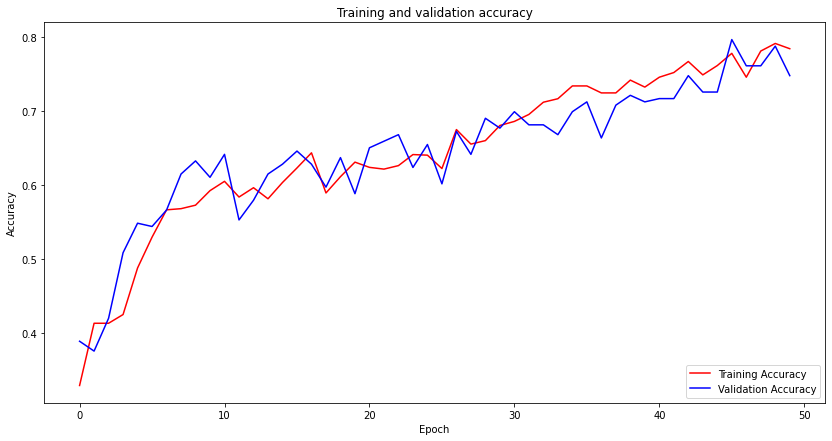

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

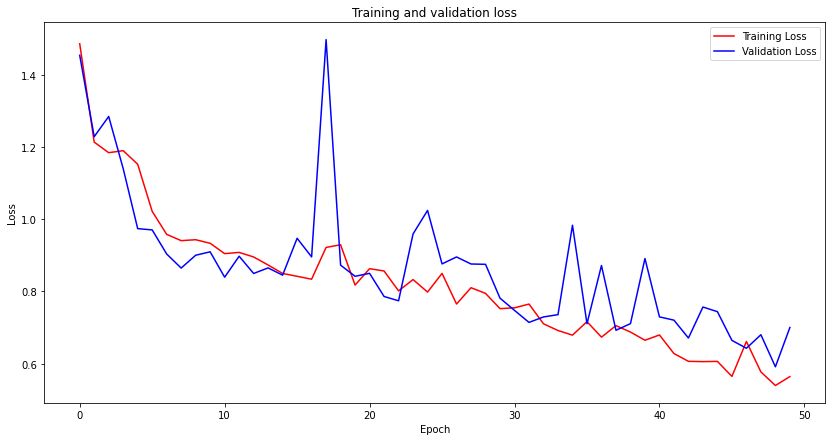

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

## Test Performance on Test Data

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

## Step 4. Checking performance on Test Data (Out of the sample)

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

NameError: ignored

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

In [ ]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

In [ ]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()